In [1]:
import os
import pandas as pd
import datetime

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import importlib


from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import callbacks  

# project specific
from utils import data_handler
from utils.models import vanilla_autoencoder

In [2]:
%load_ext tensorboard
!rm -rf ../workfiles/logs/


In [2]:
importlib.reload(data_handler) # to allow modification of the script without restarting the whole session
sgdc_params = {
            #'penalty':["elasticnet", "l1", "l2"],
            'l1_ratio':np.linspace(0.1, 1, 5),
            'alpha':np.linspace(0.1, 0.5, 5),
        }

x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, 
                                                   feature_selection_proceedure = "LASSO", 
                                                   retain_phases="2", 
                                                   return_filenames= True,
                                                   sgdc_params = sgdc_params,
                                                   subsample = 40)


retained phase 2
loading samples...
loaded 39 samples
selecting genes based on median absolute deviation threshold:  5 ...
selecting genes based on LASSO-like classification...
standardisation for LASSO regression...
Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best score: 0.8699999999999999
best estimator: SGDClassifier(alpha=0.2, l1_ratio=0.55, loss='log', penalty='elasticnet')
best_estimator_.coef_: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SUM best_estimator_.coef_: 0.06444481668869759
best_estimator_.intercept_: [ 2.48594733 -7.01502001 -6.93210564]
error rate : 0.045454545454545456
Class 0 : 0
Class 1 : 20
genes_selected [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [2]:
#x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True, batch_size = 128)

sgdc_params = {
            #'penalty':["elasticnet", "l1", "l2"],
            'l1_ratio':np.linspace(0.1, 1, 5),
            'alpha':np.linspace(0.1, 0.5, 5),
        }

x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, 
                                                   feature_selection_proceedure = "LASSO", 
                                                   retain_phases="2", 
                                                   return_filenames= True,
                                                   sgdc_params = sgdc_params)

retained phase 2
loading samples...
loaded 5740 samples


ValueError: invalid literal for int() with base 10: '40803R'

In [5]:
latent_dim = 64
t_shape = (6161)

t_shape = (10)
latent_dim = 4


autoencoder = vanilla_autoencoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [6]:
checkpoint_filepath = '../workfiles/simple_autoencoer_model/checkpoint'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)


reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=15, min_lr=0.00001)

early_stopping_callback = callbacks.EarlyStopping(monitor='loss', patience=30)


log_dir = "../workfiles/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

cb = [model_checkpoint_callback, reduce_lr, early_stopping_callback, tensorboard_callback]

In [ ]:
%tensorboard --logdir ../workfiles/logs/fit


In [7]:
hist = autoencoder.fit(x_train, epochs=1000, callbacks=cb)

Epoch 1/1000


2023-07-20 21:59:03.029668: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


45/45 [==============================] - 1s 5ms/step - loss: 918.1176 - lr: 0.0010
Epoch 2/1000
45/45 [==============================] - 0s 4ms/step - loss: 156.4767 - lr: 0.0010
Epoch 3/1000
45/45 [==============================] - 0s 5ms/step - loss: 112.3608 - lr: 0.0010
Epoch 4/1000
45/45 [==============================] - 0s 5ms/step - loss: 111.9891 - lr: 0.0010
Epoch 5/1000
45/45 [==============================] - 0s 5ms/step - loss: 111.6404 - lr: 0.0010
Epoch 6/1000
45/45 [==============================] - 0s 5ms/step - loss: 110.7663 - lr: 0.0010
Epoch 7/1000
45/45 [==============================] - 0s 5ms/step - loss: 108.4687 - lr: 0.0010
Epoch 8/1000
45/45 [==============================] - 0s 5ms/step - loss: 73.0270 - lr: 0.0010
Epoch 9/1000
45/45 [==============================] - 0s 5ms/step - loss: 56.9029 - lr: 0.0010
Epoch 10/1000
45/45 [==============================] - 0s 5ms/step - loss: 56.5616 - lr: 0.0010
Epoch 11/1000
45/45 [==============================] - 

In [8]:
autoencoder.load_weights(checkpoint_filepath)


[485.83697509765625, 145.05274963378906, 119.53865051269531, 119.40977478027344, 119.08816528320312, 118.33116149902344, 112.98784637451172, 66.49580383300781, 58.16001892089844, 57.885345458984375, 57.68592071533203, 57.36330032348633, 57.160400390625, 56.997032165527344, 57.01054382324219, 57.358917236328125, 58.064205169677734, 58.12057876586914, 57.9332389831543, 56.971309661865234, 56.52790069580078, 56.33485412597656, 56.193885803222656, 56.153751373291016, 55.975467681884766, 55.9406623840332, 55.84576416015625, 55.903594970703125, 55.972557067871094, 56.31383514404297, 56.15607452392578, 56.06625747680664, 56.435916900634766, 56.667545318603516, 56.224586486816406, 55.8237190246582, 55.30165481567383, 55.25841522216797, 55.02799987792969, 55.198421478271484, 54.70267868041992, 54.599571228027344, 54.252357482910156, 54.20614242553711, 54.273746490478516, 54.17009353637695, 54.142921447753906, 53.92581558227539, 53.846397399902344, 53.6793212890625, 53.9190673828125, 53.72478103

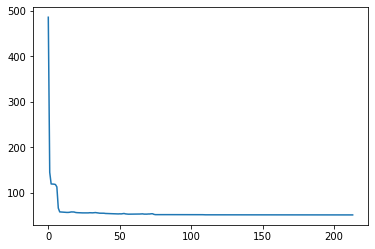

In [9]:
plt.plot(hist.history['loss'])
print(hist.history['loss'])




### some diagnosis

In [10]:
e = iter(x_train).next()
z = autoencoder.encoder(e)
z

<tf.Tensor: shape=(64, 4), dtype=float32, numpy=
array([[-6.40221357e-01, -1.60199814e+01, -4.66358566e+00,
         1.18429728e+01],
       [ 1.52777100e+01, -2.75802479e+01,  1.41713457e+01,
         1.16177263e+01],
       [ 1.04989586e+01, -3.38978500e+01, -1.03038940e+01,
         1.14946527e+01],
       [ 3.25825882e+01, -2.25181065e+01,  1.93405552e+01,
         2.23954678e+01],
       [ 1.38553009e+01, -1.87239838e+01,  2.34982944e+00,
         1.07199078e+01],
       [ 5.87625217e+00, -2.13617077e+01, -9.78373814e+00,
         1.75375175e+01],
       [ 9.44006824e+00, -2.59766636e+01, -1.20666072e-01,
         2.12356377e+01],
       [ 5.20897055e+00, -2.95632267e+01, -1.37622547e+01,
         1.21234951e+01],
       [-1.85431137e+01, -4.13393593e+01, -2.62519598e+00,
         1.71625099e+01],
       [-2.95643020e+00, -1.78274136e+01, -6.76041508e+00,
         1.47322912e+01],
       [ 5.05078673e-01, -1.67661419e+01, -6.02740049e+00,
         1.25352316e+01],
       [ 1.45355

In [11]:
print(autoencoder.decoder(z))
print(e)

tf.Tensor(
[[ 5.22576332e+01  2.44115429e+01  1.13504171e+01  4.16227102e+00
   3.08954296e+01  2.91165695e+01  2.94879074e+01  7.47062826e+00
   3.50234642e+01  8.23217869e+00]
 [ 1.16886795e+02  1.39952927e+02  3.61917686e+01  1.00728111e+01
   2.86559601e+01  3.12601624e+01  3.13164959e+01  9.06701088e+00
   4.65365829e+01  5.02266455e+00]
 [ 6.77258148e+01  2.70185966e+01  4.12205772e+01  1.04905615e+01
   3.68299370e+01  4.99588013e+01  3.18580608e+01  8.99466705e+00
   4.74577332e+01  9.87041855e+00]
 [ 5.98946648e+01  2.42930054e+02  1.65313034e+01  8.76493549e+00
   3.45219383e+01  4.71289177e+01  3.91206894e+01  1.37417488e+01
   5.38935585e+01  1.06156292e+01]
 [ 4.21184959e+01  8.37498779e+01  1.97716465e+01  4.50512028e+00
   3.01226368e+01  2.64347992e+01  3.10331936e+01  8.34296989e+00
   3.63884315e+01  8.57409763e+00]
 [ 3.41230774e+01  4.04426079e+01  1.24917974e+01  6.49677134e+00
   3.75642624e+01  4.96272888e+01  3.37631721e+01  1.00874557e+01
   4.41629524e+01  1.1

In [18]:
autoencoder.encoder.save('../workfiles/simple_autoencoer_model')


INFO:tensorflow:Assets written to: ../workfiles/simple_autoencoer_model/assets


In [12]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

45/45 [==============================] - 0s 712us/step


In [13]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [14]:
#df.to_csv("../workfiles/compressed_data_simple_autoencoder_phase_2.csv")
df.to_csv("../workfiles/lasso_whacky_test.csv")
